In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/spam.csv', encoding='ISO-8859-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# steps :
# 1) Data Cleaning
# 2) EDA
# 3) Text Preprocessing
# 4) Model Building
# 5) Evaluation
# 6) Improvements
# 7) Website
# 8) Deployment

# Data Cleaning

In [7]:
df = df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [8]:
df.rename(columns={'v1':'target','v2':'text'},inplace = True)

In [9]:
# convert the target into numerical

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['target']=le.fit_transform(df['target'])

# ham -> 0
# spam -> 1

In [10]:
# check for missing values
df.isnull().sum()

,0
target,0
text,0


In [11]:
# check for duplicates
print(df.duplicated().sum())

403


In [12]:
# remove duplicates
df = df.drop_duplicates(keep='first')
print(df.duplicated().sum())

0


In [13]:
df.shape

(5169, 2)

In [14]:
df.sample(5)

,target,text
1977,1,Reply to win å£100 weekly! Where will the 2006...
668,0,Have a good evening! Ttyl
2450,0,K..give back my thanks.
2396,0,Well you told others you'd marry them...
5112,1,December only! Had your mobile 11mths+? You ar...


# EDA

In [15]:
counts = df['target'].value_counts()
print(counts)

target
0    4516
1     653
Name: count, dtype: int64


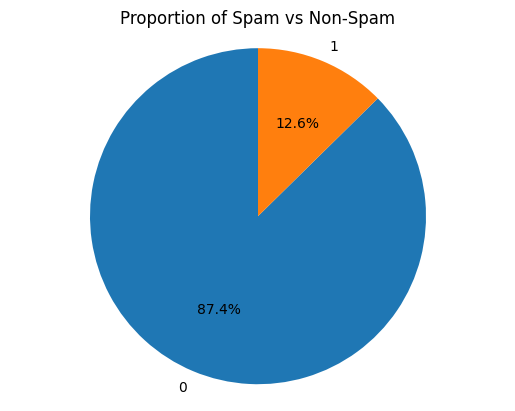

In [16]:
# representing the composition of spam and ham in a piechart


labels = counts.index
sizes = (counts / df['target'].shape[0]) * 100

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Spam vs Non-Spam')
plt.axis('equal')
plt.show()

In [17]:
# we can see that the data is imbalanced

In [18]:
# for better analysis get the number of characters in sms  , number of words in sms , number of sentences in the SmS

In [19]:
!pip install nltk

import nltk
nltk.download('all')
from nltk.tokenize import word_tokenize, sent_tokenize
df['num_chars'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x : len(word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x: len(sent_tokenize(x)))

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

In [20]:
df.head()

,target,text,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [21]:
df.describe()

,target,num_chars,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [22]:
# where messages are not spam
df[df['target']==0][['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
# where messages are spam
df[df['target']==1][['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


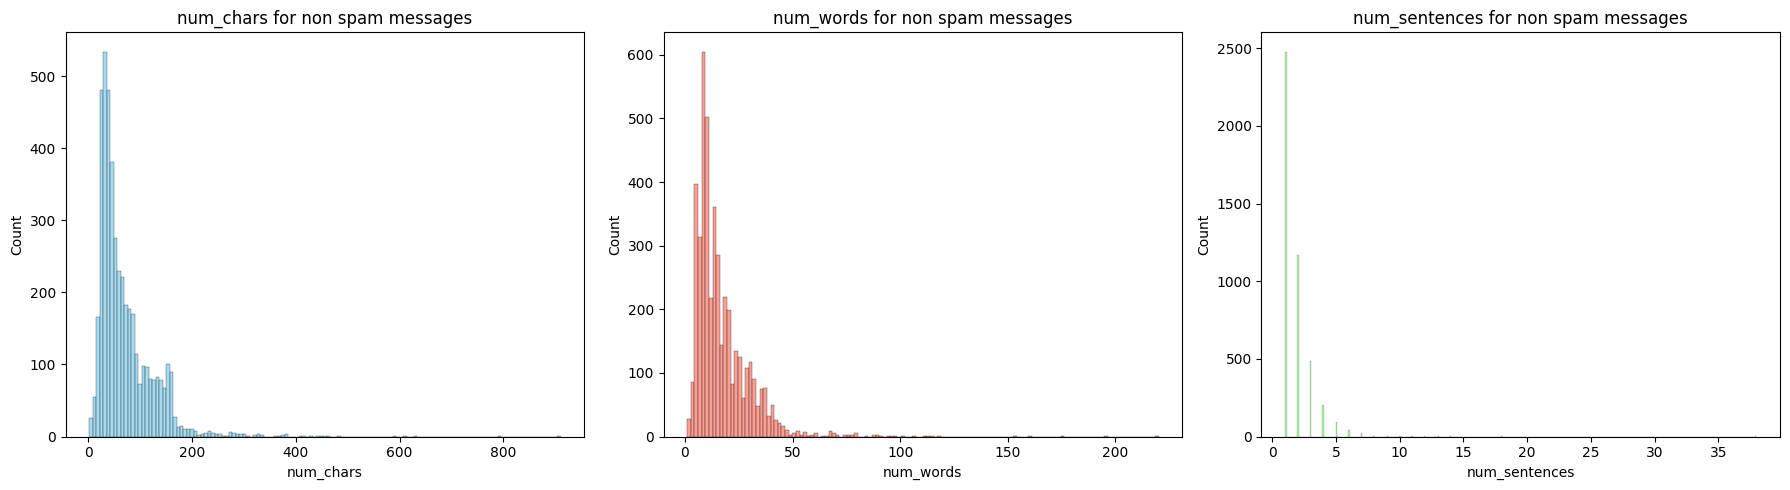

In [24]:
# histograms for non spam messages having number of words

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df[df['target'] == 0]['num_chars'], ax=axes[0], color='skyblue')
axes[0].set_title('num_chars for non spam messages')

sns.histplot(df[df['target'] == 0]['num_words'], ax=axes[1], color='salmon')
axes[1].set_title('num_words for non spam messages')

sns.histplot(df[df['target'] == 0]['num_sentences'], ax=axes[2], color='lightgreen')
axes[2].set_title('num_sentences for non spam messages')

plt.tight_layout()
plt.show()


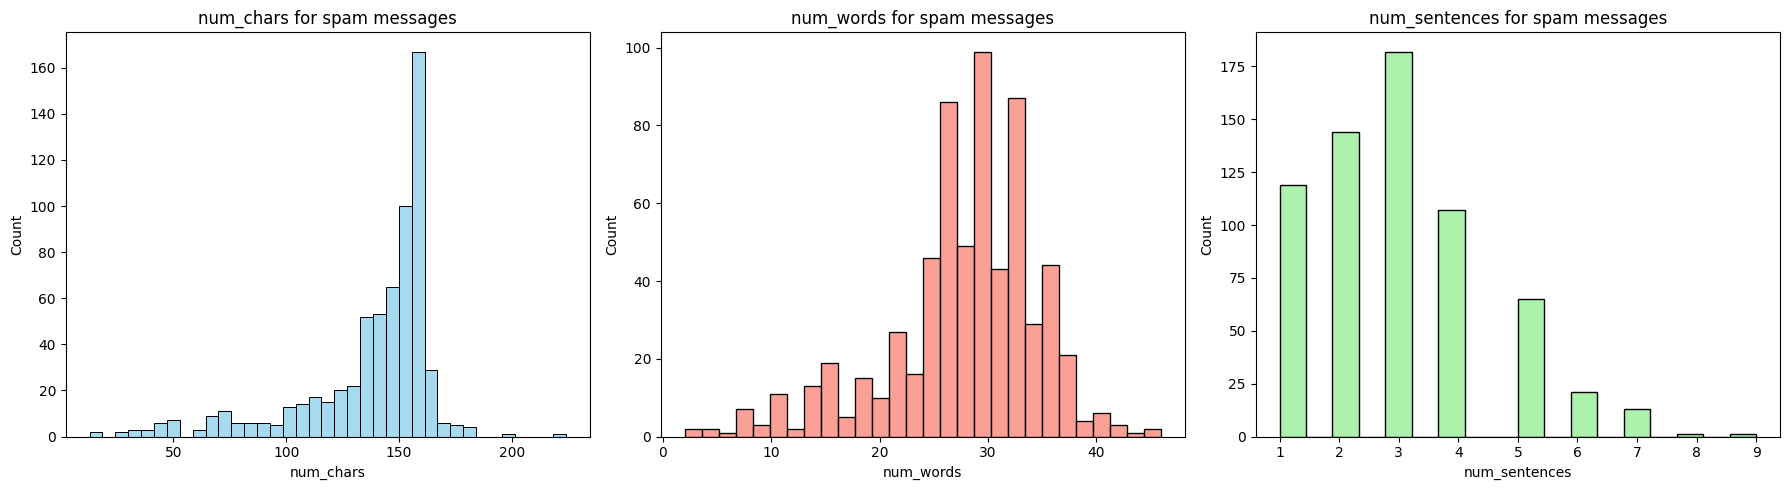

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df[df['target'] == 1]['num_chars'], ax=axes[0], color='skyblue')
axes[0].set_title('num_chars for spam messages')

sns.histplot(df[df['target'] == 1]['num_words'], ax=axes[1], color='salmon')
axes[1].set_title('num_words for spam messages')

sns.histplot(df[df['target'] == 1]['num_sentences'], ax=axes[2], color='lightgreen')
axes[2].set_title('num_sentences for spam messages')

plt.tight_layout()
plt.show()


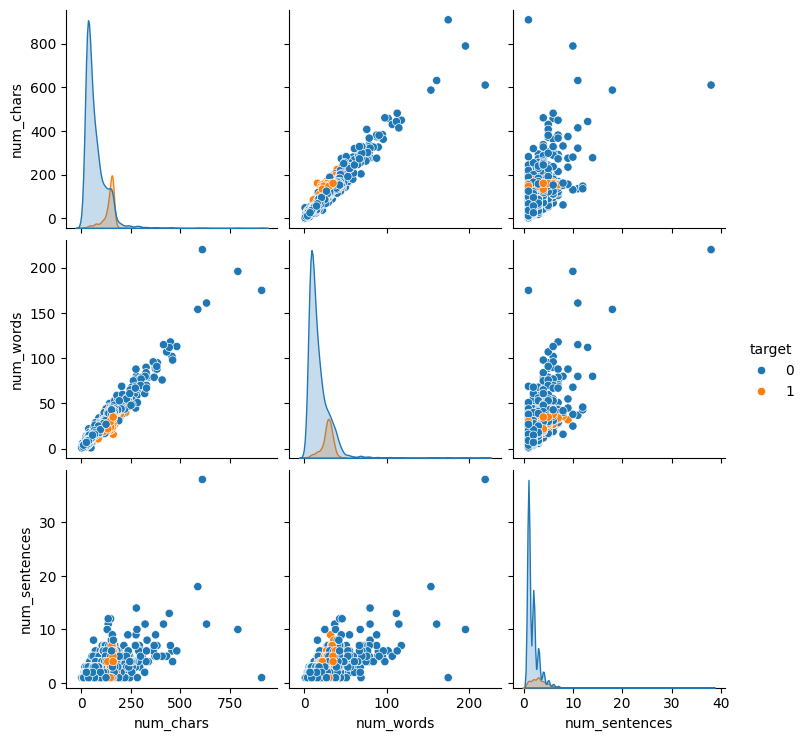

In [26]:
sns.pairplot(df,hue='target')

# relation between the columns among themselves

<Axes: >

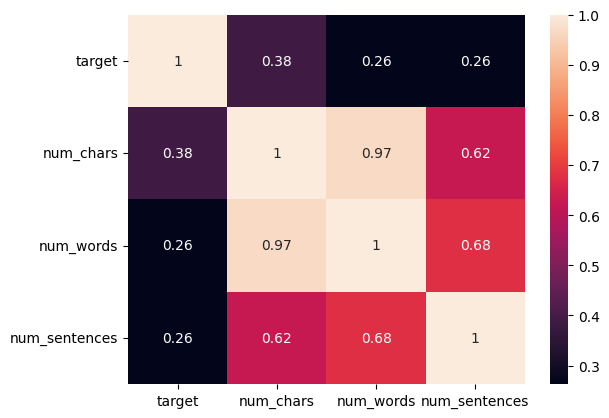

In [27]:
sns.heatmap(df[['target','num_chars','num_words','num_sentences']].corr(),annot=True)

In [28]:
# since no. of characters , no. of words and no. of sentences are directly related to each other ,
# multicollinearity arises , hence while model building only keep num_chars column as it has the variablilty

# Text Preprocessing

1) convert to lower case

2) Remove html tags

3) Remove stop words

4) Stemming

5) tokenization

In [29]:
df.head()

,target,text,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))
porter = PorterStemmer()

def tolower(text):
    return text.lower()

def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

def remove_special_chars(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

def remove_stop_words(text):
    cleaned = []
    for i in text.split():
        if i not in stop_words:
            cleaned.append(i)
    return ' '.join(cleaned)

def stemming(text):
    tokens = word_tokenize(text)
    stemmed = [porter.stem(token) for token in tokens]
    return ' '.join(stemmed)

# Apply transformations in order
df['transformed_text'] = df['text'].apply(tolower)
df['transformed_text'] = df['transformed_text'].apply(remove_html_tags)
df['transformed_text'] = df['transformed_text'].apply(remove_special_chars)
df['transformed_text'] = df['transformed_text'].apply(remove_stop_words)
df['transformed_text'] = df['transformed_text'].apply(stemming)


In [33]:
df.head()

,target,text,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah dont think goe usf live around though


In [ ]:
# get the wordcloud for spam and non spam messages to understand the most frequently occuring words in the 2 types of messages

In [36]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

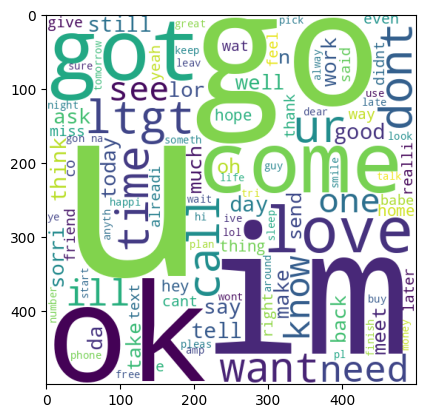

In [39]:
nonspam_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(nonspam_wc)

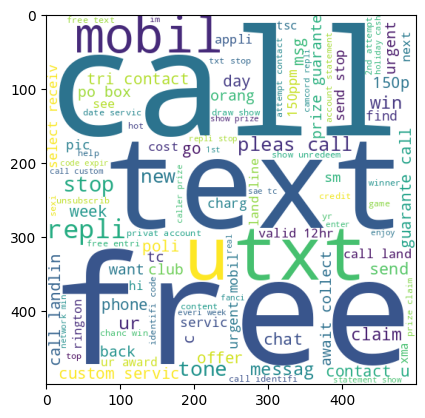

In [42]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

In [ ]:
# get the top 30 words in nonspam and spam messages

In [57]:
non_spam_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    non_spam_corpus.append(word)

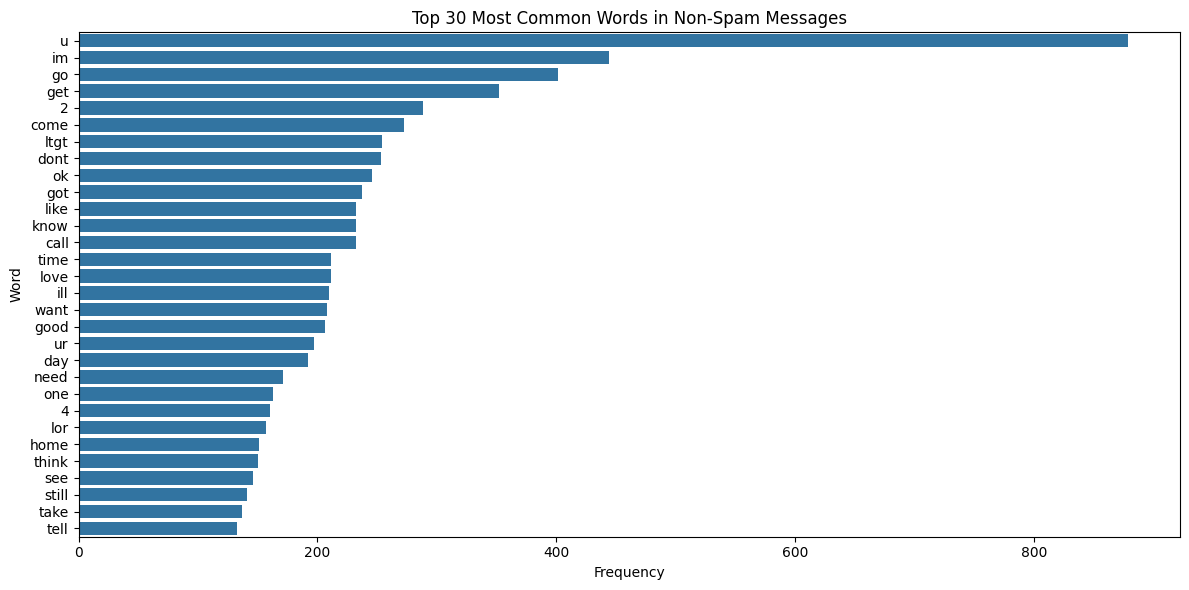

In [61]:
from collections import Counter
word_counts = Counter(non_spam_corpus).most_common(30)
df_wc = pd.DataFrame(word_counts, columns=['Word', 'Frequency'])

plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Word', data=df_wc)
plt.title("Top 30 Most Common Words in Non-Spam Messages")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.tight_layout()
plt.show()

In [59]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

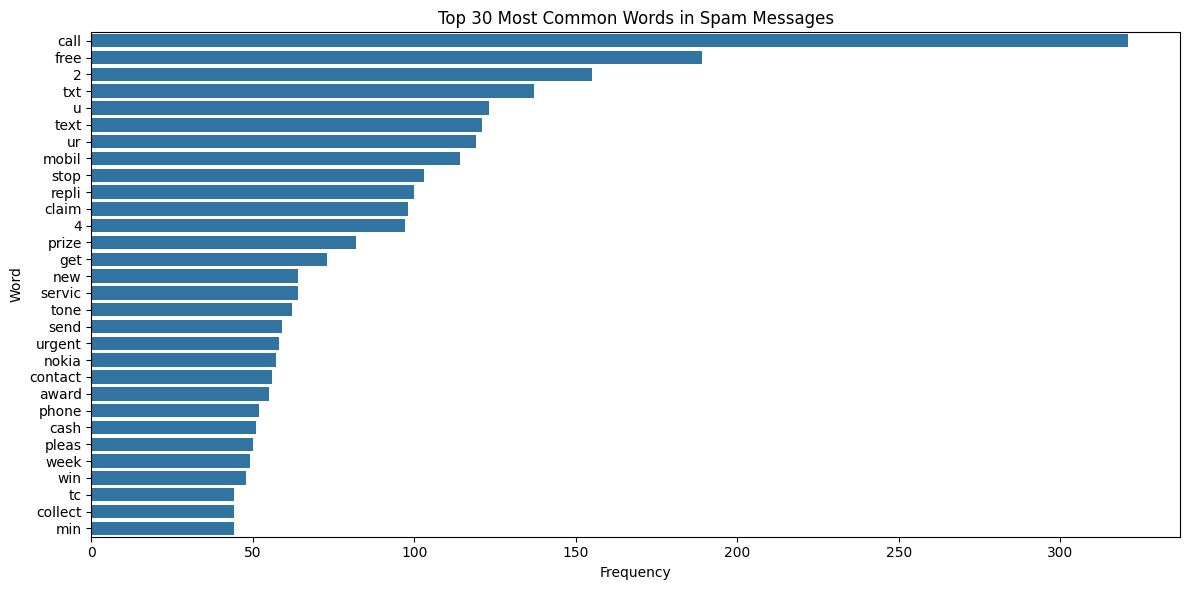

In [60]:
from collections import Counter
word_counts = Counter(spam_corpus).most_common(30)
df_wc = pd.DataFrame(word_counts, columns=['Word', 'Frequency'])

plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Word', data=df_wc)
plt.title("Top 30 Most Common Words in Spam Messages")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.tight_layout()
plt.show()

# Model Building




In [ ]:
# using naive bayes as a baseline model , since niave bayes is used to convert the text into the numerical form bag of words is used for vectorization

In [66]:
df['transformed_text'].shape

(5169,)

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df['transformed_text']).toarray() # change the shape to that many unique words

In [70]:
y = df['target'].values

In [77]:
# train test split
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train , y_test = train_test_split(X,y,test_size =0.2,random_state=2)

In [78]:
# apply naive bayes
from sklearn.naive_bayes import GaussianNB ,  MultinomialNB  , BernoulliNB
from sklearn.metrics import accuracy_score , precision_score, confusion_matrix
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

gnb.fit(X_train,y_train)
mnb.fit(X_train,y_train)
bnb.fit(X_train,y_train)

y_pred1 = gnb.predict(X_test)
y_pred2 = mnb.predict(X_test)
y_pred3 = bnb.predict(X_test)

print("accuracy of gaussian naive bayes : ",accuracy_score(y_test,y_pred1))
print("precision of gaussian naive bayes : ",precision_score(y_test,y_pred1))

print("accuracy of multinomial naive bayes : ",accuracy_score(y_test,y_pred2))
print("precision of multinomial naive bayes : ",precision_score(y_test,y_pred2))

print("accuracy of bernoulli naive bayes : ",accuracy_score(y_test,y_pred3))
print("precision of bernoulli naive bayes : ",precision_score(y_test,y_pred3))


accuracy of gaussian naive bayes :  0.8810444874274661
precision of gaussian naive bayes :  0.5330396475770925
accuracy of multinomial naive bayes :  0.965183752417795
precision of multinomial naive bayes :  0.8355263157894737
accuracy of bernoulli naive bayes :  0.9709864603481625
precision of bernoulli naive bayes :  0.9821428571428571


In [82]:
# using TF-IDF vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000) # get the 3000 most used words

X1 = tfidf.fit_transform(df['transformed_text']).toarray()
y1= df['target'].values


from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size = 0.2 ,random_state=2)

gnb.fit(X1_train,y1_train)
mnb.fit(X1_train,y1_train)
bnb.fit(X1_train,y1_train)

y_pred_1 = gnb.predict(X1_test)
y_pred_2 = mnb.predict(X1_test)
y_pred_3 = bnb.predict(X1_test)

print("accuracy of gaussian naive bayes : ",accuracy_score(y1_test,y_pred_1))
print("precision of gaussian naive bayes : ",precision_score(y1_test,y_pred_1))

print("accuracy of multinomial naive bayes : ",accuracy_score(y1_test,y_pred_2))
print("precision of multinomial naive bayes : ",precision_score(y1_test,y_pred_2))

print("accuracy of bernoulli naive bayes : ",accuracy_score(y1_test,y_pred_3))
print("precision of bernoulli naive bayes : ",precision_score(y1_test,y_pred_3))


accuracy of gaussian naive bayes :  0.8684719535783365
precision of gaussian naive bayes :  0.504424778761062
accuracy of multinomial naive bayes :  0.9738878143133463
precision of multinomial naive bayes :  1.0
accuracy of bernoulli naive bayes :  0.9825918762088974
precision of bernoulli naive bayes :  0.9918032786885246


In [ ]:
# since the data is imbalanced , precision is a better metric than accuracy

In [ ]:
# model chosen -> multinomial niave bayes on TF-IDF

In [84]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [85]:
from google.colab import files

# Download vectorizer
files.download('vectorizer.pkl')

# Download model
files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>